# Deterministic Models and Optimization: Clustering methods

**Note**: Given the text file does not work, we will simulate the data. We will use the same data simulation process as the group of Pat and co to make it more comparable.

In [1]:
import numpy as np
from numpy import random
import pandas as pd
from sklearn.neighbors import DistanceMetric
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [8]:
#Simulate the data
X1 = np.random.uniform(low= 0, high=25, size=(5))
X2 = np.random.uniform(low=5, high = 30, size=(5))
df = pd.DataFrame({'i': X1, 'j':X2})

In [9]:
df

,i,j
0,16.167538,7.474112
1,0.696681,8.281644
2,8.617123,19.640383
3,6.358177,12.778803
4,5.339280,21.599924


# Plotting the data

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
test = kmeans.predict(df)
df['label'] = test
df

,i,j,label
0,16.167538,7.474112,0
1,0.696681,8.281644,0
2,8.617123,19.640383,1
3,6.358177,12.778803,0
4,5.339280,21.599924,1


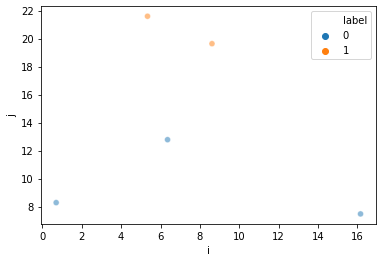

In [11]:
sns.scatterplot(data = df, x = "i", y='j', alpha = 0.5, hue = 'label')

# Define the euclidean distance

In [12]:
def euclidean_distance(df):
    x = df.iloc[:,0] #first vector
    y = df.iloc[:,1] #second vector
    weight_matrix = np.zeros(shape = (len(x),len(y)))
    data_points = []
    for i in range(0,len(x)):
        data_points.append((x[i],y[i]))
    for j in range(0, len(x)):
        point = data_points[j]
        k = 0
        for other_point in data_points:
            distance = math.sqrt((other_point[0]-point[0])**2 + (other_point[1]-point[1])**2)
            weight_matrix[j][k] = distance
            k +=1
    return weight_matrix            

We will need this weight matrix for the MST clustering algorithm.

In [13]:
test = euclidean_distance(df)
test

array([[ 0.        , 15.49191828, 14.31876075, 11.15183011, 17.79858814],
       [15.49191828,  0.        , 13.84753989,  7.23028203, 14.10426577],
       [14.31876075, 13.84753989,  0.        ,  7.22385745,  3.81890808],
       [11.15183011,  7.23028203,  7.22385745,  0.        ,  8.8797706 ],
       [17.79858814, 14.10426577,  3.81890808,  8.8797706 ,  0.        ]])

# Part 1: MST Clustering 

# Part 2: K-means Clustering